<Axes: >

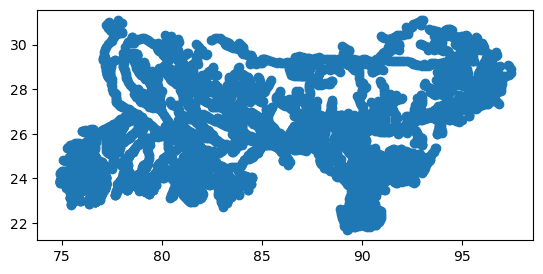

In [1]:
import geopandas as gpd#shapefile read 
gbmdf_op= gpd.read_file(r"/Users/sharm/Documents/SWOT/GBM_points.shp")
gbmdf_op = gbmdf_op.drop(columns=['records'])
# print(gbmdf_op)
gbmdf_op.plot()

In [3]:
import os
import dask
import dask.dataframe as dd
from dask.distributed import Client

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import requests

import datetime
from io import StringIO
FTS_URL = "https://fts.podaac.earthdata.nasa.gov/v1"  
HYDROCRON_URL = "https://soto.podaac.earthdatacloud.nasa.gov/hydrocron/v1/timeseries"

def query_hydrocron(query_url, reach_id, start_time, end_time, fields, empty_df):
    """Query Hydrocron for reach-level time series data.

    Parameters
    ----------
    query_url: str - URL to use to query FTS
    reach_id: str - String SWORD reach identifier
    start_time: str - String time to start query
    end_time: str - String time to end query
    fields: list - List of fields to return in query response
    empty_df: pandas.DataFrame that contains empty query results

    Returns
    -------
    pandas.DataFrame that contains query results
    """

    params = {
        "feature": "Reach",
        "feature_id": reach_id,
        "output": "csv",
        "start_time": start_time,
        "end_time": end_time,
        "fields": fields
    }
    results = requests.get(query_url, params=params)
    if "results" in results.json().keys():
        results_csv = results.json()["results"]["csv"]
        df = pd.read_csv(StringIO(results_csv))
    else:
        df = empty_df

    return df

In [4]:
gbm_file_op=pd.read_csv(r"/Users/sharm/Documents/SWOT/GBM_points.csv")
gbm_file_op['reach_id']
ids=gbm_file_op['reach_id']
ids 

0       45220200994
1       45220200131
2       45220200144
3       45220200151
4       45220201061
           ...     
7052    45249900536
7053    45230000371
7054    45230000381
7055    45311301135
7056    45220600216
Name: reach_id, Length: 7057, dtype: int64

In [6]:
# Create queries that return Pandas.DataFrame objects
start_time = "2023-01-01T00:00:00Z"
end_time = "2025-09-03T00:00:00Z"
fields = "reach_id,time_str,wse"

for reach in ids:
    pathname = r"/Users/sharm/Documents/SWOT/GBM/"+str(reach)+'.csv'#condition not to download the same files
    if os.path.exists(pathname) == False:
        # Create an empty dataframe for cases where no data is returned for a reach identifier
        empty_df = pd.DataFrame({
            "reach_id": np.int64(reach),
            "time_str": datetime.datetime(1900, 1, 1).strftime("%Y-%m-%dT%H:%M:%S"),
            "wse": -99.0,
            "wse_units": "m"
        }, index=[0])
        results = query_hydrocron(HYDROCRON_URL, reach, start_time, end_time, fields, empty_df)

   
        ddf = results.loc[(results["wse"] != -999999999999.0)]

        # # Convert time_str to datetime format
        ddf.time_str = pd.to_datetime(ddf.time_str)
        ddf['Date'] = ddf.time_str
        ddf.set_index('Date', inplace=True)
        ddf1=ddf.drop(['time_str'],axis=1)
        #ddf1.to_csv(r"/Users/sharm/Documents/SWOT/GBM/"+str(reach)+'.csv')
        ddf1.to_csv(pathname) #downloading csv file for reach_id using ids loop

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_4694/1085509220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [7]:
recordgbmdf_op=pd.DataFrame(columns=['reach_id','records'])#creating dataframe
gbm_file_op=pd.read_csv(r"/Users/sharm/Documents/SWOT/GBM_points.csv")
ids=gbm_file_op['reach_id']
for reach in ids:
    gbm_df_op = pd.read_csv('/Users/sharm/Documents/SWOT/GBM/'+str(reach)+'.csv')
    recordgbmdf_op.loc[len(recordgbmdf_op)]=[reach,gbm_df_op.shape[0]-1]
    print(reach,gbm_df_op.shape[0]-1)#Counting gbm  
print("Total reach_id processed:", len(recordgbmdf_op))

45220200994 0
45220200131 0
45220200144 0
45220200151 0
45220201061 0
45220201091 0
45220201121 0
45220201141 0
45220201151 0
45220201081 0
45220201171 0
45253002061 0
45220200344 0
45220200121 0
45220201011 0
45220201021 0
45220201041 0
45220201071 0
45220201111 0
45220201131 0
45253002015 0
45220200885 0
45220200855 0
45230000365 0
45253002005 0
45220200455 0
45220200465 0
45220200475 0
45220200485 0
45220200495 0
45220200505 0
45220200515 0
45220200525 0
45220200535 57
45220200245 0
45220200895 0
45220200845 28
45220200775 42
45220200045 0
45220200051 0
45220200061 0
45220200071 0
45220200081 0
45220200091 0
45220200101 0
45220200111 0
45220200715 52
45220200965 50
45220200935 56
45220200635 48
45220200665 34
45220200795 45
45220200785 39
45220200765 41
45220200735 50
45220200725 55
45220200295 0
45220200985 45
45220200915 0
45220200875 0
45253002025 0
45220200305 0
45220200745 40
45220200025 0
45220200035 0
45220200545 57
45220200595 55
45220200325 57
45220200335 0
45220200015 0
45

45241200221 0
45241200231 23
45241200241 51
45241200251 26
45241200261 16
45241200271 30
45241200281 37
45241200291 22
45241200301 38
45241200311 52
45241200341 35
45241200351 48
45241200361 41
45241200371 45
45241200541 55
45241200551 55
45241200561 0
45241200681 57
45241200741 57
45241200881 0
45241200874 0
45241200721 0
45241200691 0
45241200863 0
45241200851 0
45241200841 0
45241200831 0
45241200821 0
45241200811 0
45241200421 28
45241200401 39
45241200391 35
45241200381 39
45241200431 27
45241200444 0
45241200451 37
45241200464 0
45241200471 0
45241200484 0
45241200494 0
45241200504 0
45241200511 55
45241200015 0
45241200025 0
45241200045 0
45241200055 0
45241200065 0
45241200075 0
45241200606 0
45241200326 0
45241200576 0
45241200736 0
45241200706 0
45241200526 0
45241300015 55
45241300055 51
45241300065 0
45241300074 49
45241300084 0
45241300191 0
45241300135 46
45241300175 44
45241300165 34
45241300025 0
45241300045 45
45241300095 50
45241300145 51
45241300155 48
45241300185 47

45243500521 0
45243500031 84
45243500041 111
45243500051 84
45243500441 52
45243500451 0
45243500531 52
45243500061 0
45243500081 58
45243500071 58
45243500091 57
45243500541 85
45243500551 0
45243500101 56
45243500181 55
45243500121 0
45243500191 54
45243500201 54
45243500161 53
45243500131 56
45243500141 58
45243500151 55
45243500513 0
45243500501 57
45243500211 48
45243500561 0
45243500221 52
45243500231 58
45243500241 53
45243500251 52
45243500261 58
45243500271 0
45243500284 0
45243500291 58
45243500301 58
45243500311 58
45243500321 58
45243500334 0
45243500341 84
45243500351 84
45243500364 0
45243500371 0
45243500381 84
45243500391 84
45243500411 53
45243500471 48
45243500426 0
45243500486 0
45243600011 76
45243600021 85
45243600031 85
45243600041 76
45243600051 56
45243600061 56
45243600071 56
45243600081 56
45243600091 55
45243601941 0
45243700021 85
45243601961 0
45243600171 0
45243600181 54
45243600191 53
45243600201 55
45243601981 0
45243601921 0
45243601901 0
45243600221 55

45245600171 132
45245600181 149
45245600191 130
45245600201 146
45245600211 166
45245600221 166
45245600231 138
45245700011 137
45245700021 134
45245700191 138
45245700031 118
45245700041 119
45245700051 124
45245700061 134
45245700071 137
45245700081 132
45245700091 109
45245700101 166
45245700111 167
45245700121 193
45245700131 167
45245700141 140
45245700151 140
45245700161 140
45245700171 140
45245700181 140
45245700206 0
45245800011 138
45245800021 135
45245800531 81
45245800541 80
45245800551 54
45245800561 103
45245800571 0
45245800594 0
45245800971 47
45245800991 140
45245800603 0
45245800613 0
45245800621 0
45245800631 50
45245800641 80
45245800651 96
45245800671 0
45245801016 0
45245801006 0
45245800686 0
45245900021 139
45245900061 0
45245900041 38
45252000711 0
45252000721 0
45252000101 84
45252000111 84
45252000121 84
45252000131 0
45252000144 0
45252000151 82
45252000161 84
45252000171 0
45252000181 83
45252000191 84
45252000204 0
45252000211 57
45252000771 0
45252000781 

45256700131 54
45256700141 41
45256700151 0
45256900011 0
45256900021 0
45256900031 24
45256900046 0
45255000141 77
45257000011 0
45257000371 0
45257000021 81
45257000031 75
45257000121 53
45257000131 29
45257000421 0
45257000041 57
45257000051 57
45257000061 47
45257000411 0
45257000081 79
45257000091 0
45257000101 86
45257000111 82
45257000141 46
45257000151 58
45257000161 56
45257000171 29
45257000181 68
45257000191 29
45257000201 49
45257000211 59
45257000224 0
45257000231 56
45257000241 57
45257000251 59
45257000261 0
45257000271 59
45257000401 0
45257000291 58
45257000301 59
45257000311 58
45257000286 0
45257000326 0
45258000011 29
45258000461 0
45258000471 0
45258000491 0
45258000021 59
45258000031 29
45258000041 29
45258000051 71
45258000061 86
45258000071 56
45258000081 57
45258000091 57
45258000101 71
45258000391 0
45258000411 0
45258000111 76
45258000121 54
45258000131 36
45258000141 57
45258000151 57
45258000161 36
45258000171 36
45258000301 44
45258000371 54
45258000181 36

45291001581 0
45291001601 0
45291001611 0
45291001621 0
45291001631 0
45291000061 85
45291000071 58
45291000081 58
45291000101 57
45291001521 0
45291001531 0
45291001541 114
45291000981 54
45291000991 50
45291001001 54
45291001011 58
45291001021 52
45291001481 0
45291000121 58
45291000131 57
45291000141 12
45291000151 58
45291000161 58
45291000171 57
45291001391 0
45291000181 58
45291001371 0
45291000191 57
45291000201 57
45291000211 18
45291001211 77
45291001231 0
45291000221 56
45291000241 41
45291000251 58
45291001151 46
45291001171 51
45291001191 45
45291000921 34
45291000931 57
45291000941 58
45291000951 52
45291000961 54
45291000271 54
45291000831 60
45291000891 29
45291000901 23
45291000281 58
45291000671 26
45291000681 27
45291000701 29
45291000751 30
45291000291 58
45291000301 58
45291000311 58
45291000801 60
45291000321 57
45291000331 58
45291000601 57
45291000611 51
45291000621 40
45291000771 46
45291000341 24
45291000351 0
45291000361 57
45291000541 58
45291000551 50
452910

45299900051 51
45299900061 47
45299900071 56
45299900081 56
45299900091 56
45299900101 48
45299900111 56
45299900121 56
45299900141 83
45299900231 53
45299900241 0
45299900151 0
45299900171 0
45299900181 67
45299900211 34
45299900136 0
45299900196 0
45299900226 0
45311400395 69
45311400385 67
45241100335 0
45312001245 52
45220300321 0
45243600921 54
45243600931 57
45243600941 57
45243600951 58
45243600961 58
45243600971 55
45243600981 55
45243600991 0
45243601461 58
45243601501 75
45243601511 71
45243601521 0
45243601531 52
45243601821 54
45243601831 55
45243601841 63
45243601471 57
45243601481 84
45243601491 83
45243803671 54
45243803681 53
45243803691 140
45243803701 164
45253001741 0
45270000941 56
45280200291 0
45280200301 0
45280200111 29
45280200121 29
45280200131 29
45280200141 0
45280200151 30
45280200161 47
45280200171 53
45280200181 53
45280200371 0
45280200381 0
45280200391 0
45280200191 58
45280200201 55
45280200211 55
45280200221 49
45280200231 56
45280200241 0
45280200251

45244900286 0
45245600741 51
45245600751 50
45245600761 0
45245600771 67
45245600781 79
45245600241 137
45245600791 79
45245600801 77
45245600811 78
45245600821 75
45245600831 76
45245600841 50
45245600851 62
45245600861 75
45245600871 74
45245600881 76
45245600891 77
45245600251 138
45245600261 136
45245600271 132
45245600281 53
45245600291 139
45245600301 159
45245600331 48
45245600341 51
45245600351 124
45245600361 131
45245600371 138
45245600381 138
45245600961 72
45245600971 58
45245600981 0
45245600991 0
45245601001 0
45245600311 167
45245600321 165
45245600391 140
45245600401 139
45245600411 49
45245600421 40
45245600431 37
45245600444 0
45245600451 50
45245600461 75
45245600471 75
45245600481 61
45245600491 50
45245600601 46
45245600611 50
45245600901 55
45245600911 52
45245600921 51
45245600931 68
45245600941 79
45245600501 51
45245600511 51
45245600521 139
45245600531 139
45245600541 136
45245600551 53
45245600561 54
45245600571 53
45245600581 76
45245601016 0
45245600626 0
4

45247202731 0
45247202741 0
45247202811 0
45247202821 0
45247202831 0
45247201341 0
45247201354 0
45247201361 0
45247201374 -1
45247201381 57
45247201394 -1
45247201401 33
45247201414 18
45247202101 51
45247202114 0
45247202124 -1
45247202131 41
45247202144 -1
45247202151 57
45247202164 -1
45247202171 47
45247202184 -1
45247202191 37
45247202204 10
45247201071 56
45247201084 -1
45247201091 53
45247201104 -1
45247201111 57
45247201124 -1
45247201131 38
45247201421 0
45247201434 -1
45247201441 40
45247201454 18
45247201044 0
45247201051 52
45247201064 0
45247201461 0
45247201474 0
45247201484 -1
45247201494 0
45247201501 51
45247201514 0
45247201524 0
45247201531 52
45247201544 0
45247201551 0
45247202751 0
45247202761 0
45247202771 0
45247202791 0
45247201251 0
45247201264 0
45247201271 0
45247201284 0
45247201291 0
45247201304 0
45247201321 56
45247201144 -1
45247201151 57
45247201164 24
45247201171 0
45247201184 0
45247201191 0
45247201201 22
45247201211 0
45247201231 0
45247201564 0


45248401396 0
45248401236 0
45248401186 0
45248401156 0
45248401116 0
45248500011 79
45248500021 80
45248500031 52
45248500041 52
45248600011 52
45248600021 79
45248600031 79
45248600041 51
45248600051 51
45248600061 51
45248600071 51
45248600081 51
45248600091 47
45248600101 50
45248600111 50
45248600121 49
45248600131 49
45248600143 49
45248600161 51
45248600211 43
45248600221 47
45248600231 43
45248600241 30
45248600251 40
45248600261 0
45248600281 0
45248600301 0
45248600311 0
45248600331 0
45248600193 0
45248600176 0
45248600296 0
45248600346 0
45248600206 0
45248700011 55
45248800011 55
45248800021 60
45248800031 81
45248800041 80
45248800051 51
45248800061 108
45248800071 105
45248800811 0
45248800821 40
45248800831 0
45248800841 0
45248800853 0
45248800861 0
45248802781 0
45248802791 0
45248802803 0
45248800081 51
45248800093 0
45248800103 0
45248800111 75
45248800123 51
45248800131 62
45248800143 0
45248800153 0
45248800163 51
45248800171 56
45248800183 56
45248800191 0
452488

45311101775 0
45311100975 84
45311101625 0
45311101215 37
45311101345 69
45311101205 83
45311101105 0
45311100875 55
45311101245 48
45311101046 0
45311100476 0
45311100456 0
45311100426 0
45311200176 0
45311101146 0
45311100986 0
45311101186 0
45311101226 0
45311200015 37
45230000185 55
45311200025 0
45311200045 0
45311200075 0
45311200195 32
45311200235 0
45311200065 0
45311200115 44
45311200255 0
45311200105 0
45311200095 27
45311200135 31
45311200145 38
45311200155 34
45311200165 46
45311200205 41
45311200035 0
45311200246 0
45311200216 0
45311300035 0
45311300865 37
45311300915 0
45311300155 0
45311300945 0
45311300215 56
45311301035 0
45311301065 0
45311301085 0
45311301115 0
45311301095 0
45311300755 49
45311300475 33
45311300265 45
45311300275 57
45311300125 -1
45311300115 0
45311300105 57
45311300075 52
45311300145 56
45311300325 43
45311300335 41
45311300345 34
45311300785 45
45311300775 0
45311300765 57
45311300285 38
45311300385 34
45311300795 55
45311300295 37
45311300305 4

In [8]:
print(recordgbmdf_op)

         reach_id  records
0     45220200994        0
1     45220200131        0
2     45220200144        0
3     45220200151        0
4     45220201061        0
...           ...      ...
7052  45249900536        0
7053  45230000371        0
7054  45230000381        0
7055  45311301135        0
7056  45220600216        0

[7057 rows x 2 columns]


In [9]:
merged_gdfgbm_op = gbmdf_op.merge(recordgbmdf_op, on='reach_id', how='left')
merged_gdfgbm_op.to_file(r"/Users/sharm/Documents/SWOT/Geojson/records_points.geojson", driver="GeoJSON")#record save gbm